# Difusión en una dimensión

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Parámetros

In [3]:
L  = 1.0           # longitud del sistema 1D
nx = 42            # nodos espaciales
dx = L / nx
x = np.linspace( 0 , L - dx , num=nx )

T= 0.1               # tiempo total
nt = 1000            # pasos temporales
dt = T / nt

D = 1              # difusividad

In [4]:
def chistera(L, x1, x2,nx) :
    u = np.zeros( nx )
    dx = L / (nx-2) 
    n1 = int(x1 / dx)
    n2 = int(x2 / dx)
    u[ n1 : n2 ] = 1
    return u

In [5]:
def gaussiana(L, mean, sigma, nx) :
    u = np.zeros( nx )
    dx = L / (nx-2) 

    for i in range(0,nx):
        x = i * dx - mean
        u[i] = np.exp( - (x/sigma)**2 / 2)

    return u

### Número difusivo

In [6]:
Co_D = D * dt / dx**2
Co_D

0.17640000000000003

### Condiciones iniciales

In [7]:
u0 = chistera(L, L/4, L/2,nx)

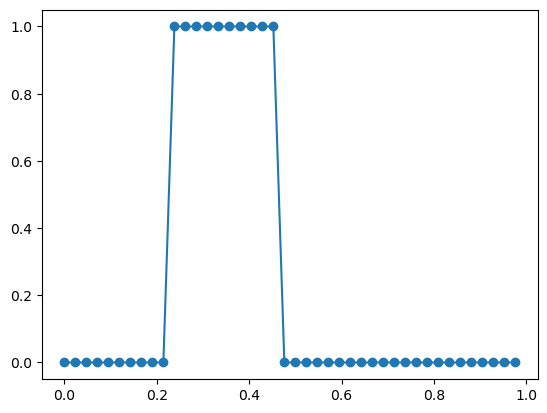

In [8]:
plt.plot( x , u0 , 'o-')

### Un paso en el tiempo

Recordemos que queremos implementar $u_i^{n+1} = u_i^n + \mathrm{Co}_D (u_{i+1}^n +  u_{i-1}^n  - 2 u_i^n)$

Aumentamos nuestro sistema con dos extremos adicionales, que ponemos 0 (condiciones de Dirichlet homogéneas)

In [9]:
u = np.zeros( nx + 2  )

In [10]:
u[ 1 : nx +1 ] = u0

In [11]:
nnx = u.size

In [12]:
un = u.copy()         # distribución actual

for i in range( 1 , nx +1 ):
   u[i] = un[i] + Co_D * (un[i+1] + un[i-1] - 2 * un[i] )


El vector uf recibe la solución final, y le quitamos los dos extremos:

In [13]:
uf = u[ 1 : nx +1 ]

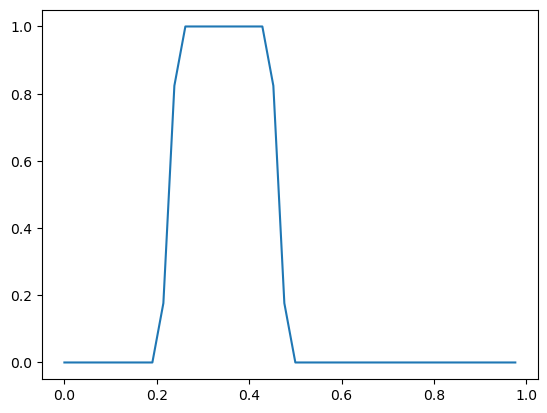

In [14]:
plt.plot( x , uf)

### Tiempo completo

In [15]:
u[ 0 ] = u[ nx + 1 ] = 0
u[ 1 : nx +1 ] = u0

In [16]:
for n in range(nt ):
    un = u.copy()
    for i in range( 1 , nx +1 ): 
           u[i] = un[i] + (Co_D / 2.0) * (un[i+1] + un[i-1] - 2 * un[i] )        

In [17]:
uf = u[ 1 : nx +1 ]

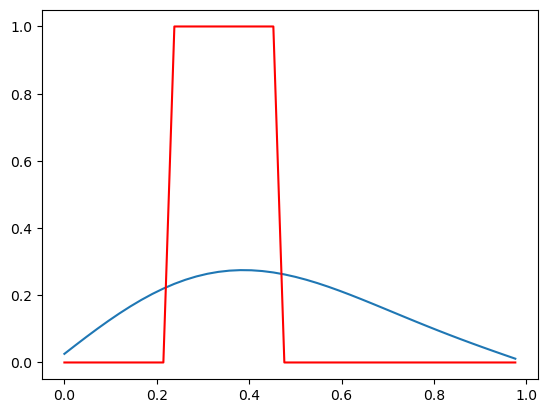

In [18]:
plt.plot(x , uf , x , u0 , 'r')

Es interesante comprobar si se pierde "masa" (energía... lo que sea )

In [19]:
import scipy.integrate as integrate

In [20]:
I0 = integrate.trapezoid( x, u0)
print( I0 )

-0.23809523809523808


In [21]:
integrate.trapezoid( x, uf)

np.float64(-0.15586260326552004)

... probablemente, se pierde por los bordes sobre todo

## Condiciones "adiabáticas" (Neumann homogéneas)

In [63]:
u[ 0 ] = u0[0]
u[-1]  = u0[-1]
u[ 1 : nx +1 ] = u0

I = [I0]

In [65]:
for n in range( nt ):
    un = u.copy()
    un [0]  = un[1]   # derivada cero a la izquierda
    un [-1] = un[-2]  # derivada cero a la derecha
    
    # una alternativa sería hacer un bucle de 2 a nx sólo, con expresiones
    # especiales para 1 y nx+1
    for i in range( 1 , nx +1 ): 
           u[i] = un[i] + (Co / 2.0) * (un[i+1] + un[i-1] - 2 * un[i] )
    
    I.append(  integrate.trapezoid( x, u[1 : nx+1 ] ) )

In [66]:
uf = u[ 1 : nx +1 ]

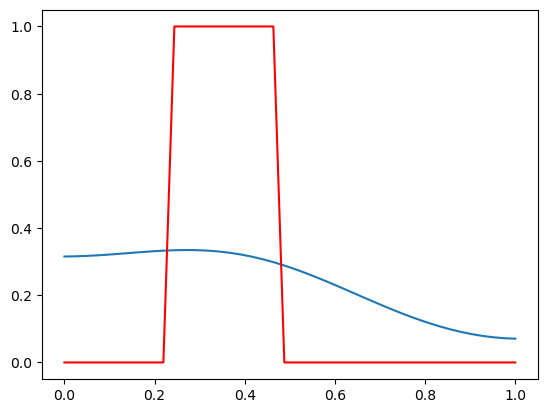

In [67]:
plt.plot(x , uf , x , u0 , 'r')

In [68]:
integrate.trapezoid( x, uf )

np.float64(-0.1683835176500454)

In [69]:
I0

np.float64(-0.24390243902439024)

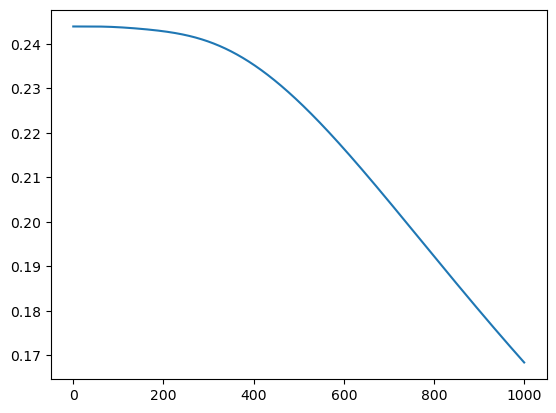

In [70]:
plt.plot( (-1)*np.array(I) )